# Calculus tutorial

Click the binder button [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/minireference/noBSstats/HEAD?labpath=tutorials/calculus_tutorial.ipynb) or this link [`bit.ly/calctut3`](https://bit.ly/calctut3) to run this notebooks interactively.

**Abstract** Calculus is the study of the properties of functions.
The operations of calculus are used to describe the limit behaviour of functions,
calculate their rates of change, and calculate the areas under their graphs.
In this section we'll learn about the `SymPy` functions for calculating
limits, derivatives, integrals, and summations.


In [1]:
%pip install -q numpy scipy sympy matplotlib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={"font.family": "serif",
        "font.serif": ["Palatino", "DejaVu Serif", "serif"],
        "figure.figsize": (5, 1.7)},
)
%config InlineBackend.figure_format = 'retina'

# simple float __repr__
np.set_printoptions(legacy='1.25')

In [3]:
# Temporary for figure generation
import os
from ministats.utils import savefigure

In [4]:
# Temporary to extract ASCII text for codeblocks
from sympy import init_printing
init_printing(pretty_print=False)

## Introduction

### Example 1: file download

### Example 2: Euler's number

In [5]:
import sympy as sp
n = sp.symbols("n")
sp.limit( (1+1/n)**n, n, sp.oo).evalf()

2.71828182845905

### Doing calculus

#### Numerical computing using NumPy

In [ ]:
%pip install -q numpy

In [6]:
import numpy as np

#### Scientific computing using SciPy

In [ ]:
%pip install -q scipy

In [7]:
from scipy.integrate import quad

#### Symbolic calculations using SymPy

In [4]:
%pip install -q sympy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import sympy as sp

# define symbolic variables
x, a, b, c = sp.symbols('x a b c')

The `symbols` function creates SymPy symbolic variables.
Unlike ordinary Python variables that hold a particular value,
SymPy variables act as placeholders that can take on any value.
We can use the symbolic variables to create expressions,
just like we do with math variables in pen-and-paper calculations.

## Math prerequisites

### Sets and intervals

In [9]:
S = {1, 2, 3}
T = {3, 4, 5, 6}

print("S ∪ T =", S.union(T))
print("S ∩ T =", S.intersection(T))
print("S \\ T =", S.difference(T))

S ∪ T = {1, 2, 3, 4, 5, 6}
S ∩ T = {3}
S \ T = {1, 2}


## Functions

In Python, we define functions using the `def` keyword.

For example, the code cell below defines the function $f(x)=\frac{1}{2}x^2$,
then evaluate it for the input $x=3$.

In [10]:
# define the function f that takes input x
def f(x):
    return 0.5 * x**2

# calling the function g on input x=4
f(3)

4.5

### Plotting the graph of the function $g(x)$

The graph of the function $g(x)$ is obtained by plotting a curve
that passes through the set of input-output coordinate pairs $(x, g(x))$.

Saved figure to figures/tutorials/calculus/graph_of_function_f_eq_halfx2.pdf
Saved figure to figures/tutorials/calculus/graph_of_function_f_eq_halfx2.png


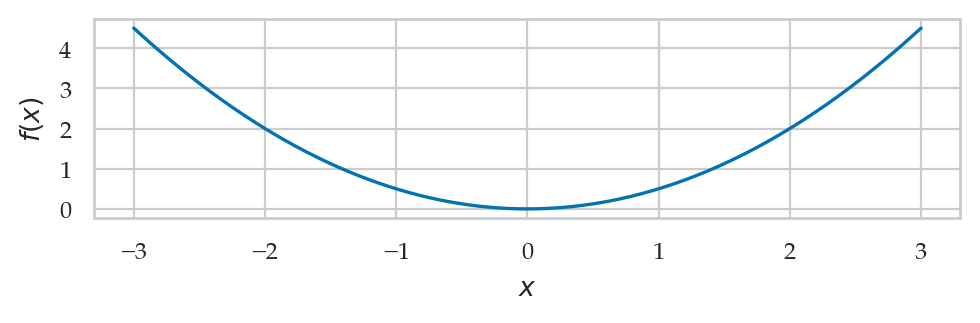

In [11]:
import numpy as np
import seaborn as sns

xs = np.linspace(-3, 3, 1000)
fxs = f(xs)
sns.lineplot(x=xs, y=fxs);

# FIGURES ONLY
ax = plt.gca()
ax.set_yticks([0,1,2,3,4])
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")
filename = os.path.join("figures/tutorials/calculus", "graph_of_function_f_eq_halfx2.pdf")
savefigure(plt.gca(), filename)

The function `linspace(-3,3,1000)` creates an array of `1000` points in the interval $[-3,3]$.
We store this sequence of inputs into the variable `xs`.
Next, we computer the output value $f(x)$ for each of the inputs in the array `xs`,
and store the result in the array `fxs`.
Finally, we use the function `sns.lineplot()` to generate the plot.

In [12]:
from math import sqrt
sqrt(2*4.5)

3.0

Examples of function-followed-by-inverse-function calculations:

In [13]:
from math import exp, log
log(exp(5))

5.0

### Function inventory

Saved figure to figures/tutorials/calculus/panel_function_graphs1.pdf
Saved figure to figures/tutorials/calculus/panel_function_graphs1.png


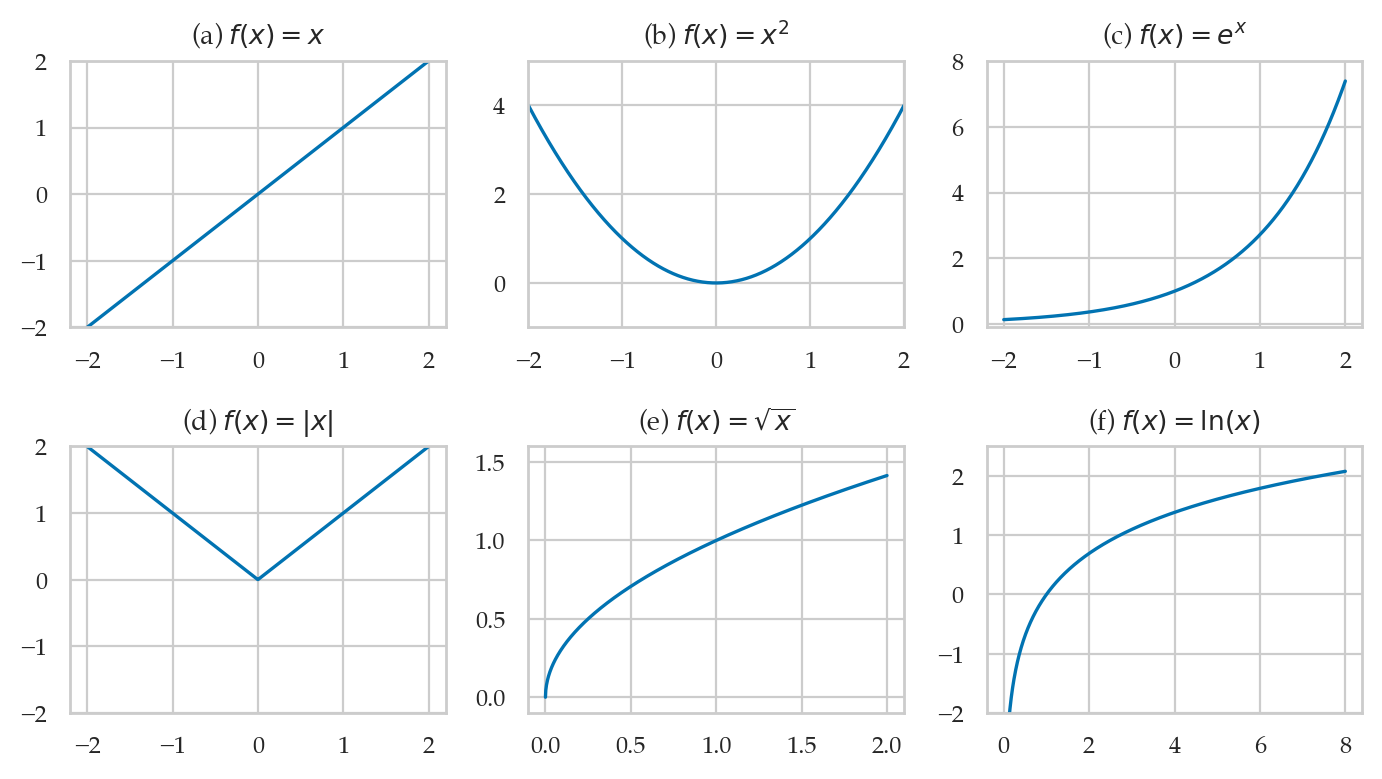

In [14]:
def plot_func(f, xlim=[-1,1], ylim=None, ax=None, title=None):
    xs = np.linspace(xlim[0], xlim[1], 1000)
    fxs = np.array([f(x) for x in xs])
    ax = sns.lineplot(x=xs, y=fxs, ax=ax)
    ax.set_title(title)
    ax.set_ylim(ylim)
    return ax

fig, axs = plt.subplots(2, 3, figsize=(7,4))


# (a) line
def line(x):
    return x
ax_a = axs[0][0]
plot_func(line, xlim=[-2,2], ylim=[-2,2], ax=ax_a, title="(a) $f(x) = x$")

# (d) |x|
ax_d = axs[1][0]
plot_func(np.abs, xlim=[-2,2], ylim=[-2,2], ax=ax_d, title="(d) $f(x) = |x|$")


# (b) quadratic
ax_b = axs[0][1]
def quadratic(x):
    return x**2
plot_func(quadratic, xlim=[-2,2], ylim=[-1,5], ax=ax_b, title="(b) $f(x) = x^2$")


# (e) square root
ax_e = axs[1][1]
plot_func(np.sqrt, xlim=[0,2], ylim=[-0.1,1.6], ax=ax_e, title="(e) $f(x) = \\sqrt{x}$")
ax_b.set_xlim([-2,2])

# (c) exp
ax_c = axs[0][2]
plot_func(np.exp, xlim=[-2,2], ylim=[-0.1,8], ax=ax_c, title="(c) $f(x) = e^x$")


# (f) log
ax_f = axs[1][2]
plot_func(np.log, xlim=[0.00001,8], ylim=[-2,2.5], ax=ax_f, title="(f) $f(x) = \\ln(x)$")
ax_b.set_xlim([-2,2])

fig.tight_layout()

# FIGURES ONLY
filename = os.path.join("figures/tutorials/calculus", "panel_function_graphs1.pdf")
savefigure(plt.gca(), filename)

## Limits

### Example

Consider a polygon with $n$ sides inscribed in inside of a circle of radius $r$.

In [15]:
import math

def calc_area(n, r=1):
    theta = 2 * math.pi / (2 * n)
    a = r * math.cos(theta)
    b = r * math.sin(theta)
    area = 2 * n * a * b / 2
    return area

for n in [6, 8, 10, 50, 100, 1000, 10000]:
    area_n = calc_area(n)
    error = area_n - math.pi
    print(f"{n=}, {area_n=}, {error=}")

n=6, area_n=2.5980762113533156, error=-0.5435164422364775
n=8, area_n=2.8284271247461903, error=-0.3131655288436028
n=10, area_n=2.938926261462365, error=-0.2026663921274281
n=50, area_n=3.133330839107606, error=-0.008261814482187102
n=100, area_n=3.1395259764656687, error=-0.0020666771241244497
n=1000, area_n=3.141571982779476, error=-2.0670810317202637e-05
n=10000, area_n=3.1415924468812855, error=-2.067085076440378e-07


### Infinity

The infinity symbol is denoted `oo` (two lowercase `o`s) in `SymPy`. Infinity
is not a number but a process: the process of counting forever. Thus,
$\infty + 1 = \infty$, $\infty$ is greater than any finite number, and $1/\infty$ is an
infinitely small number. `Sympy` knows how to correctly treat infinity
in expressions:

In [16]:
from sympy import oo
oo+1

oo

In [17]:
5000 < oo

True

In [18]:
1/oo

0

### Limits

We use limits to describe, with mathematical precision, infinitely large
quantities, infinitely small quantities, and procedures with infinitely
many steps.

Limits are also useful to describe the behaviour of functions.
Consider the function $f(x) = \frac{1}{x}$.
The `limit` command shows us what happens to $f(x)$ as $x$ goes to infinity:

In [19]:
x = sp.symbols("x")
sp.limit(1/x, x, oo)

0

As $x$ becomes larger and larger, the fraction $\frac{1}{x}$ becomes smaller
and smaller. In the limit where $x$ goes to infinity, $\frac{1}{x}$ approaches
zero: $\lim_{x\to\infty}\frac{1}{x} = 0$.

### Example 2

In [20]:
x = sp.symbols("x")

sp.limit( (2*x+1)/x , x, sp.oo)

2

#### Euler's number
The number $e$ is defined as the limit $e \equiv \lim_{n\to\infty}\left(1+\frac{1}{n}\right)^n$:

In [21]:
n = sp.symbols("n")
sp.limit( (1+1/n)**n, n, sp.oo)

E

In [22]:
sp.limit( (1+1/n)**n, n, sp.oo).evalf()

2.71828182845905

This limit expression describes the annual growth rate of a loan with
a nominal interest rate of 100\% and infinitely frequent compounding.
Borrow $\$1000$ in such a scheme, and you'll owe $\$2718.28$ after one year.

#### Euler's number

Euler's constant $e = 2.71828\dots$ is defined one of several ways,

$$
e \equiv \lim_{n\to\infty}\left(1+\frac{1}{n}\right)^n
  \equiv \lim_{\epsilon\to 0}(1+\epsilon)^{1/\epsilon}
  \equiv \sum_{n=0}^{\infty}\frac{1}{n!},
$$

and is denoted `E` in `SymPy`. Using `exp(x)` is equivalent to `E**x`.

The functions `log` and `ln` both compute the logarithm base $e$:

## Derivatives

### Derivatives

The derivative function, denoted $f'(x)$, $\frac{d}{dx}f(x)$, $\frac{df}{dx}$, or $\frac{dy}{dx}$, 
describes the *rate of change* of the function $f(x)$.

### Numerical derivative calculations

In [23]:
def differentiate(f, x, delta=1e-9):
    """
    Compute the derivative of the function `f` at `x`
    using the rise-over-run calculation for run `delta`.
    """
    df = f(x+delta) - f(x)
    dx = delta
    return df / dx

In [24]:
def f(x):
    return 0.5 * x**2

differentiate(f, 1)

1.000000082740371

### Derivative formulas

### Derivative rules

### Higher derivatives

### Examples

### Computing derivatives using SymPy

The `SymPy` function `diff` computes the derivative of any expression:

In [25]:
m, x, b = sp.symbols("m x b")
sp.diff(m*x + b, x)

m

In [26]:
x, n = sp.symbols("x n")
sp.simplify(sp.diff(x**n, x))

n*x**(n - 1)

The exponential function $f(x)=e^x$ is special because it is equal to its derivative:

In [27]:
from sympy import exp
sp.diff(exp(x), x)

exp(x)

#### Examples revisited

In [28]:
sp.diff(sp.exp(x**2), x)

2*x*exp(x**2)

In [29]:
sp.diff(sp.sin(x)*sp.exp(x**2), x)

2*x*exp(x**2)*sin(x) + exp(x**2)*cos(x)

In [30]:
sp.diff(sp.sin(x**2), x)

2*x*cos(x**2)

### Applications of derivatives

#### Tangent lines

The *tangent line* to the function $f(x)$ at $x=x_0$ is 
the line that passes through the point $(x_0, f(x_0))$ and has 
the same slope as the function at that point.
The tangent line to the function $f(x)$ at the point $x=x_0$ is described by the equation

$$
   T_1(x) =  f(x_0) \ + \  f'(x_0)(x-x_0).
$$

What is the equation of the tangent line to $f(x)=\frac{1}{2}x^2$ at $x_0=1$?

In [31]:
from sympy import S

fs = x**2 / 2
fs

x**2/2

In [32]:
df = sp.diff(fs, x)
df

x

In [33]:
a = 1
T_1 = fs.subs({x:a}) + df.subs({x:a})*(x - a)
T_1

x - 1/2

### Optimization

Optimization is about choosing an input for a function $f(x)$ that results in the best value for $f(x)$.
The best value usually means the *maximum* value 
(if the function represents something desirable like profits) 
or the *minimum* value 
(if the function represents something undesirable like costs).

The derivative $f'(x)$ encodes the information about the *slope* of $f(x)$.
Positive slope $f'(x)>0$ means $f(x)$ is increasing,
negative slope $f'(x)<0$ means $f(x)$ is decreasing, 
and zero slope $f'(x)=0$ means the graph of the function is horizontal.
The *critical points* of a function $f(x)$ are the solutions to the equation $f'(x)=0$.
Each critical point is a candidate to be either a maximum or a minimum of the function.

<!-- 
The second derivative $f^{\prime\prime}(x)$ encodes the information about the *curvature* of $f(x)$.
Positive curvature means the function looks like $x^2$,
negative curvature means the function looks like $-x^2$. -->

#### Analytical optimization using SymPy

Let's find the critical points of the function $f(x)=x^3-2x^2+x$ 
and use the information from its second derivative 
to find the maximum of the function 
on the interval $x \in [0,1]$.

In [34]:
x = sp.symbols('x')
fs = x**3 - 2*x**2 + x

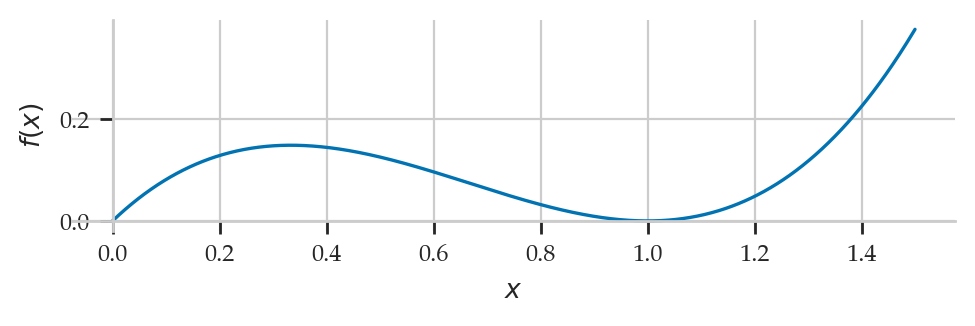

In [35]:
sp.plot(fs, (x,0,1.5));

In [36]:
sp.diff(fs, x).factor()

(x - 1)*(3*x - 1)

In [37]:
sols = sp.solve( sp.diff(fs,x),  x)
sols  # critical values

[1/3, 1]

In [38]:
sp.diff(fs, x, 2).subs({x:sols[0]})

-2

In [39]:
sp.diff(fs, x, 2).subs({x:sols[1]})

2

It we look at the graph of this function,
we see the point $x=\frac{1}{3}$ is a local maximum because it is a critical point of $f(x)$
where the curvature is negative, meaning $f(x)$ looks like the peak of a mountain at $x=\frac{1}{3}$.
The maximum value of $f(x)$ on the interval $x\in [0,1]$ is $f\!\left(\frac{1}{3}\right)=\frac{4}{27}$.
The point $x=1$ is a local minimum because it is a critical point
with positive curvature, meaning $f(x)$ looks like the bottom of a valley at $x=1$.

#### Numerical optimization

In [40]:
def derivative_descent(f, x0=0, alpha=0.05, tol=1e-10):
    """
    Find the minimum of the function `f` using gradient descent.
    """
    current_x = x0
    change = 1
    while change > tol:
        df_at_x = differentiate(f, current_x)
        next_x = current_x - alpha * df_at_x
        change = abs(next_x - current_x)
        current_x = next_x
    return current_x

In [41]:
def f(x):
    return 0.5*x**2

derivative_descent(f, x0=10)

1.3416853179730663e-09

#### Numerical optimization using SciPy

Let's solve the same optimization problem using the function `minimize` from `scipy.optimize`.

In [42]:
from scipy.optimize import minimize

res = minimize(f, x0=10)

res["x"][0]  # = argmin f(x)

-4.142702514364771e-08

## Integrals

### Integrals as areas

The *integral* of $f(x)$ corresponds to the computation of the area under the graph of $f(x)$.
The area under $f(x)$ between the points $x=a$ and $x=b$ is denoted as follows:

$$
 A(a,b) = \int_a^b f(x) \: dx.
$$


#### Example 1: integral of a constant function

In [43]:
def f(x):
    return 3

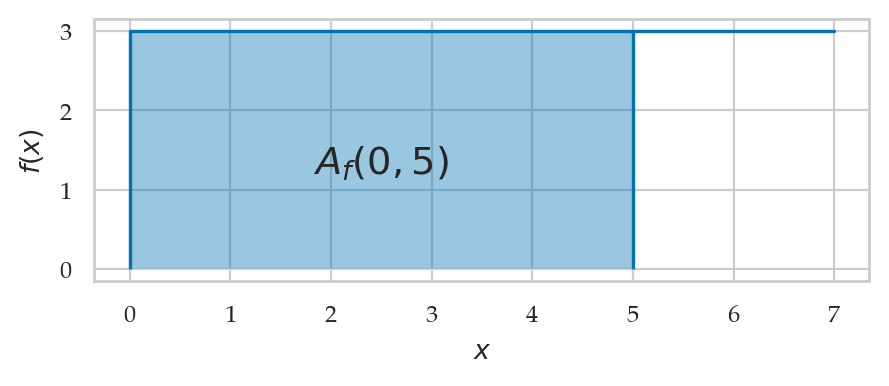

In [44]:
xs = np.linspace(0, 7, 1000)
fxs = np.array([f(x) for x in xs])

ax = sns.lineplot(x=xs, y=fxs)
ax.set_xticks(range(0,7+1))
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")

# highlight the area under f(x) between x=a and x=b
a, b = 0, 5
mask = (xs > a) & (xs < b)
ax.fill_between(xs[mask], y1=fxs[mask], alpha=0.4)
ax.vlines([a], ymin=0, ymax=f(a))
ax.vlines([b], ymin=0, ymax=f(b))
ax.text((a+b)/2, 0.4*f(a), "$A_f(0,5)$", ha="center", fontsize="x-large");

#### Example 2: integral of a linear function

In [45]:
def g(x):
    return x

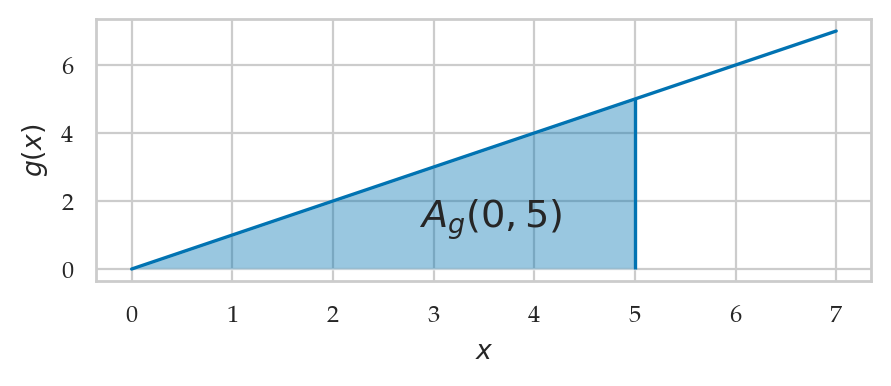

In [46]:
xs = np.linspace(0, 7, 1000)
gxs = g(xs)

ax = sns.lineplot(x=xs, y=gxs)
ax.set_xticks(range(0,7+1))
ax.set_xlabel("$x$")
ax.set_ylabel("$g(x)$")

# highlight the area under g(x) between x=a and x=b
a, b = 0, 5
mask = (xs > a) & (xs < b)
ax.fill_between(xs[mask], y1=gxs[mask], alpha=0.4)
ax.vlines([a], ymin=0, ymax=g(a))
ax.vlines([b], ymin=0, ymax=g(b))
ax.text((a+b)/1.4, 0.5*g((a+b)/2), "$A_g(0,5)$", ha="center", fontsize="x-large");

#### Example 3: integral of a polynomial

In [135]:
def h(x):
    return 4 - x**2

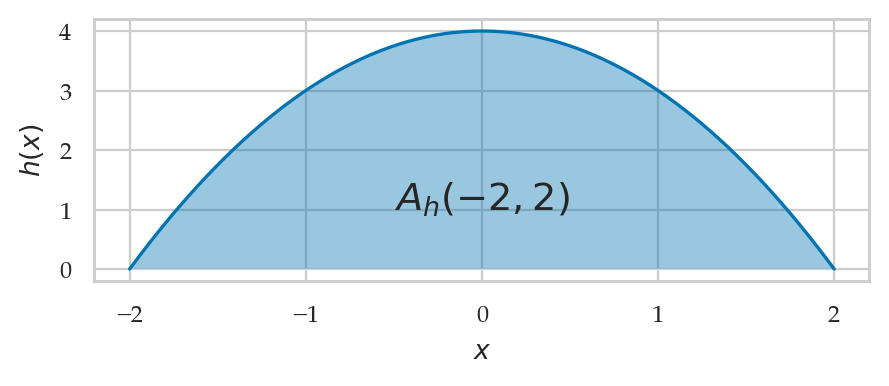

In [146]:
xs = np.linspace(-2, 2, 1000)
hxs = h(xs)

ax = sns.lineplot(x=xs, y=hxs)
ax.set_xticks(range(-2,2+1))
ax.set_xlabel("$x$")
ax.set_ylabel("$h(x)$")

# highlight the area between h(x) and x-axis between x=a and x=b
a, b = -2, 2
mask = (xs > a) & (xs < b)
ax.fill_between(xs[mask], y1=hxs[mask], alpha=0.4)
ax.vlines([a], ymin=0, ymax=h(a))
ax.vlines([b], ymin=0, ymax=h(b))
ax.text((a+b)/1.4, 1, "$A_h(-2,2)$", ha="center", fontsize="x-large");

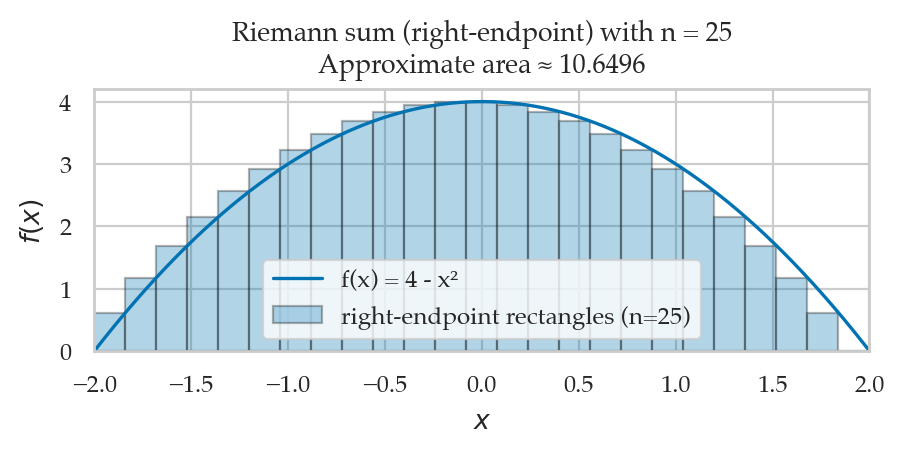

In [147]:
def riemann_sum(f, a, b, n, endpoint="right"):
    """
    Compute the Riemann sum of f on [a, b] with n rectangles.

    endpoint: "left", "right", or "mid".
    Returns (approximation, sample_points, dx).
    """
    a = float(a)
    b = float(b)
    n = int(n)

    dx = (b - a) / n
    edges = np.linspace(a, b, n + 1)

    if endpoint == "left":
        xs = edges[:-1]
    elif endpoint == "right":
        xs = edges[1:]
    elif endpoint == "mid":
        xs = 0.5 * (edges[:-1] + edges[1:])
    else:
        raise ValueError("endpoint must be 'left', 'right', or 'mid'")

    fx = f(xs)
    approx = np.sum(fx * dx)
    return approx, xs, dx


def plot_riemann_sum(f, a, b, n, endpoint="right"):
    """
    Plot f(x) on [a, b] together with its Riemann sum rectangles.
    """
    approx, sample_xs, dx = riemann_sum(f, a, b, n, endpoint=endpoint)

    # Smooth curve for the function
    x_plot = np.linspace(a, b, 1000)
    y_plot = f(x_plot)

    fig, ax = plt.subplots()

    # Plot the function
    ax.plot(x_plot, y_plot, label="f(x) = 4 - x²")

    # Build rectangles using the sample points
    if endpoint == "right":
        left_edges = sample_xs - dx
    elif endpoint == "left":
        left_edges = sample_xs
    elif endpoint == "mid":
        left_edges = sample_xs - dx / 2
    else:
        raise ValueError("endpoint must be 'left', 'right', or 'mid'")

    heights = f(sample_xs)

    # Draw rectangles
    ax.bar(left_edges, heights, width=dx, align="edge",
           edgecolor="black", alpha=0.3, label=f"{endpoint}-endpoint rectangles (n={n})")

    # Axis formatting
    ax.set_xlim(a, b)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$f(x)$")
    ax.set_title(f"Riemann sum ({endpoint}-endpoint) with n = {n}\nApproximate area ≈ {approx:.4f}")
    ax.legend()

    plt.show()


a, b, n = -2, 2, 25
plot_riemann_sum(h, a, b, n, endpoint="right")

### Computing integrals numerically using Python

Computing integral of $f(x)$ "numerically" means
we're splitting the region of integration into many (think thousands or millions) of strips,
computing the areas of these strips,
then adding up the areas to obtain the total area under the graph of $f(x)$.
The approximation to the area under $f(x)$ between $x=a$ and $x=b$
using $n$ rectangular strips corresponds to the following formula:

$$
    A_f(a,b)
    \approx
    \sum_{k=1}^{n} f(a + k\Delta x)\,\Delta x,
$$

where $\Delta x = \frac{b-a}{n}$ is the width of the rectangular strips.
The right endpoint of the $k$\textsuperscript{th}
is located at $x_k = a + k\Delta x$,
so the height of the rectangular strips $f(x_k)$
varies as $k$ goes from between $k=1$ (first strip)
and $k=n$ (last strip).

In [111]:
def integrate(f, a, b, n=10000):
    """
    Computes the area under the graph of `f`
    between `x=a` and `x=b` using `n` rectangles.
    """
    dx = (b - a) / n                       # width of rectangular strips
    xs = [a + k*dx for k in range(1,n+1)]  # right-corners of the strips
    fxs = [f(x) for x in xs]               # heights of the strips
    area = sum([fx*dx for fx in fxs])      # total area
    return area

#### Example 3 continued: integral of a polynomial

In [128]:
def h(x):
    return 4 - x**2

In [129]:
integrate(h, a=-2, b=2, n=25)

10.6496

In [130]:
integrate(h, a=-2, b=2, n=50)

10.6624

In [131]:
integrate(h, a=-2, b=2, n=1000)

10.666656

In [132]:
integrate(h, a=-2, b=2, n=100000)

10.6666666656

#### Example 1 and 2 revisited

In [133]:
def f(x):
    return 3

integrate(f, a=0, b=5, n=100000)

15.000000000000002

In [134]:
def g(x):
    return x

integrate(g, a=0, b=5, n=100000)

12.500125

### Computing integrals numerically using SciPy

We'll now show some examples using the function `quad` form the module `sympy.integrate`.



The function `quad(f,a,b)` is short for quadrature,
which is an old name for computing areas.

In [119]:
from scipy.integrate import quad

quad(f, 0, 5)

(15.0, 1.6653345369377348e-13)

The function `quad` returns two numbers as output:
the value of the integral and a precision parameter.
In output of the code,
tells us the value of the integral is $\int_{-1}^4 h(x)\,dx$
is `15.0` and guarantees the accuracy of this value up to an error of $3\times 10^{-13}$.

Since we're usually only interested in the value of the integral, we often select the first output of `quad` so you'll see the code like `quad(...)[0]` in all the code examples below.

In [120]:
quad(f, 0, 5)[0]

15.0

#### Example 2N

Define the function $g(x) = x$.

In [124]:
def g(x):
    return x

quad(g, 0, 5)[0]

12.5

#### Example 3N

Lets now compute $\int_{-1}^4 h(x)\,dx$

In [125]:
def h(x):
    return 4 - x**2

In [127]:
quad(h, -2, 2)[0]

10.666666666666666

### Riemann sums

As $n$ goes to infinity...

### Integrals as functions


The *integral function* $F$ corresponds to the area calculation as a function 
of the upper limit of integration:

$$
  F(c) \equiv \int_0^c \! f(x)\:dx\,.
$$

The area under $f(x)$ between $x=a$ and $x=b$ is obtained by 
calculating the *change* in the integral function:

$$
   A(a,b) = \int_a^b \! f(x)\:dx  =  F(b)-F(a).
$$

In `SymPy` we use `integrate(f, x)` to obtain the integral function $F(x)$ of any function $f(x)$:
$F(x) = \int_0^x f(u)\,du$.

### Symbolic integration using SymPy

This is known as an *indefinite integral* since the limits of integration are not defined. 

In contrast, 
a *definite integral* computes the area under $f(x)$ between $x=a$ and $x=b$.
Use `integrate(f, (x,a,b))` to compute the definite integrals of the form $A(a,b)=\int_a^b f(x) \, dx$:

In [64]:
from sympy import symbols

# define symbolic variables
x, a, b, c, m = symbols('x a b c m')

The `symbols` function creates SymPy symbolic variables.
Unlike ordinary Python variables that hold a particular value,
SymPy variables act as placeholders that can take on any value.

We can use the symbolic variables to create expressions,
just like we do with math variables in pen-and-paper calculations.

#### Example 1: constant function $f(x)=c$

In [65]:
fx = c
fx

c

We'll use the SymPy function `integrate` for computing integrals.
We call this function
by passing in the expression we want to integrate as the first argument.
The second argument is a triple $(x,a,b)$,
which specifies the variable of integration $x$,
the lower limit of integration $a$,
and the upper limit of integration $b$.

In [66]:
from sympy import integrate

integrate(fx, (x,a,b))  # = A_f(a,b)

-a*c + b*c

The answer $c\cdot (b-a)$ is the general expression for calculating the area under $f(x)=c$,
for between any starting point $x=a$ and end point $x=b$.
Geometrically, this is just a height-times-width formula for the area of a rectangle.

To compute the specific integral between $a=0$ and $b=5$ under $f(x)=3$,
we use the `subs` (substitute) method,
passing in a Python dictionary of the values we want to "plug" into the general expression.

In [67]:
integrate(fx, (x,a,b)).subs({c:3, a:0, b:5})

15

The integral function (indefinite integral) $F_0(b) = \int_0^b f(x) dx$ is obtained as follows.

In [68]:
F0 = integrate(fx, (x,0,b))  # = F_0(b)
F0

b*c

We can obtain the area by using $A(a,b) = F(x)\big\vert_a^b \equiv F(b) - F(a)$:

In [69]:
F0.subs({c:3, b:5}) - F0.subs({c:3, b:0})

15

#### Example 2: line $g(x) = mx$

In [70]:
gx = m*x
gx

m*x

In [71]:
integrate(gx, (x,a,b))  # = A_g(a,b)

-a**2*m/2 + b**2*m/2

In [72]:
integrate(gx, (x,a,b))

-a**2*m/2 + b**2*m/2

In [73]:
integrate(gx, (x,a,b)).subs({m:1, a:0, b:5})

25/2

The integral function $G_0(b) = \int_0^b g(x) dx$ is obtained by leaving the variable upper limit of integrartion.

In [74]:
G0 = integrate(gx, (x,0,b))  # = G_0(b)
G0

b**2*m/2

We can obtain the area by using $A_g(a,b) = G_0(b) - G_0(a)$:

In [75]:
G0.subs({m:1, b:5}) - G0.subs({m:1, b:0})

25/2

#### Example 3: polynomial function $h(x) = 4 - x^2$

In [76]:
hx = 4 - x**2
hx

4 - x**2

In [77]:
H0 = sp.integrate(hx, x, (x,0,b))
H0

-b**4/12 + 2*b**2

In [78]:
H_from_minus2 = sp.integrate(hx, (x,-2,b))
H_from_minus2

-b**3/3 + 4*b + 16/3

In [79]:
H_from_minus2.subs({b:2})

32/3

In [80]:
H_from_minus2.subs({b:2}).evalf()

10.6666666666667

### Fundamental theorem of calculus

The integral is the &ldquo;inverse operation&rdquo; of the derivative.
If you perform the integral operation followed by the derivative operation on some function, 
you'll obtain the same function:

$$
  \left(\frac{d}{dx} \circ \int dx \right) f(x) \equiv \frac{d}{dx} \int_c^x f(u)\:du = f(x).
$$

In [81]:
f = x**2
F = sp.integrate(f, x)
F

x**3/3

In [82]:
sp.diff(F,x)

x**2

Alternately, if you compute the derivative of a function followed by the integral,
you will obtain the original function $f(x)$ (up to a constant):

$$
  \left( \int dx \circ \frac{d}{dx}\right) f(x) \equiv \int_c^x f'(u)\;du = f(x) + C.
$$

In [83]:
f = x**2
df = sp.diff(f,x)
df

2*x

In [84]:
sp.integrate(df, x)

x**2

The fundamental theorem of calculus is important because it tells us how to solve differential equations.
If we have to solve for $f(x)$ in the differential equation $\frac{d}{dx}f(x) = g(x)$,
we can take the integral on both sides of the equation to obtain the answer $f(x) = \int g(x)\,dx + C$.

### Techniques of integration

### Applications of integration

#### Kinematics

The *uniform acceleration motion* (UAM) equations...

Let's analyze the case where the net force on the object is constant.
A constant force causes a constant acceleration $a = \frac{F}{m} = \textrm{constant}$.
If the acceleration function is constant over time $a(t)=a$.
We find $v(t)$ and $x(t)$ as follows:

In [85]:
t, a, v_i, x_i = sp.symbols('t a v_i x_i')
v = v_i + sp.integrate(a, (t, 0,t) )
v

a*t + v_i

In [86]:
x = x_i + sp.integrate(v, (t, 0,t) )
x

a*t**2/2 + t*v_i + x_i

You may remember these equations from your high school physics class.
They are the *uniform accelerated motion* (UAM) equations:

\begin{align*}
 a(t) &= a,                                  \\ 
 v(t) &= v_i  + at,                          \\[-2mm] 
 x(t) &= x_i + v_it + \frac{1}{2}at^2.
\end{align*}

In high school, you probably had to memorize these equations.
Now you know how to derive them yourself starting from first principles.

## Sequences and series

### Sequences

Sequences are functions that take whole numbers as inputs.
Instead of continuous inputs $x\in \mathbb{R}$,
sequences take natural numbers $k\in\mathbb{N}$ as inputs.
We denote sequences as $a_k$ instead of the usual function notation $a(k)$.

We define a sequence by specifying an expression for its $k^\mathrm{th}$ term:

In [87]:
k = sp.symbols("k")

a_k = 1 / k
b_k = 1 / sp.factorial(k)

Substitute the desired value of $k$ to see the value of the $k^\mathrm{th}$ term:

In [88]:
a_k.subs({k:5})

1/5

The `Python` list comprehension syntax `[item for item in list]`
can be used to print the sequence values for some range of indices:

In [89]:
[ a_k.subs({k:i}) for i in range(1,8) ]

[1, 1/2, 1/3, 1/4, 1/5, 1/6, 1/7]

In [90]:
[ b_k.subs({k:i}) for i in range(0,8) ]

[1, 1, 1/2, 1/6, 1/24, 1/120, 1/720, 1/5040]

Observe that $a_k$ is not defined for $k=0$
since $\frac{1}{0}$ is a division-by-zero error.
In other words,
the domain of $a_k$ is the nonnegative natural numbers $a_k:\mathbb{N}_+ \to \mathbb{R}$.
Observe how quickly the `factorial` function $k!=1\cdot2\cdot3\cdots(k-1)\cdot k$ grows:
$7!= 5040$, $10!=3628800$, $20! > 10^{18}$.

We're often interested in calculating the limits of sequences as $k\to \infty$.
What happens to the terms in the sequence when $k$ becomes large?

In [91]:
sp.limit(a_k, k, sp.oo)

0

In [92]:
sp.limit(b_k, k, sp.oo)

0

Both $a_k=\frac{1}{k}$ and $b_k = \frac{1}{k!}$ *converge* to $0$ as $k\to\infty$. 

### Series

Suppose we're given a sequence $a_k$
and we want to compute the sum of all the values in this sequence $\sum_{k}^\infty a_k$.
Series are sums of sequences.
Summing the values of a sequence $a_k:\mathbb{N}\to \mathbb{R}$
is analogous to taking the integral of a function $f:\mathbb{R} \to \mathbb{R}$.

To work with series in `SymPy`,
use the `summation` function whose syntax is analogous to the `integrate` function: 

In [93]:
a_k = 1 / k
sp.summation(a_k, (k,1,sp.oo))

oo

In [94]:
b_k = 1 / sp.factorial(k)
sp.summation(b_k, (k,0,sp.oo))

E

We say the series $\sum a_k$ *diverges* to infinity (or *is divergent*)
while the series $\sum b_k$ converges (or *is convergent*).
As we sum together more and more terms of the sequence $b_k$,
the total becomes closer and closer to some finite number.
In this case,
the infinite sum $\sum_{k=0}^\infty \frac{1}{k!}$ converges to the number $e=2.71828\ldots$.


The `summation` command is useful because it allows us to compute `infinite` sums,
but for most practical applications we don't need to take an infinite number of terms in a series to obtain a good approximation. 
This is why series are so neat: they represent a great way to obtain approximations.

Using standard `Python` commands,
we can obtain an approximation to $e^5$ that is accurate to six decimals by summing 10 terms in the series:

In [95]:
import math

def b_kf(n): 
    return 1.0/math.factorial(n)

sum( [b_kf(k) for k in range(0, 10)] )

2.7182815255731922

In [96]:
sp.E.evalf()  # true value

2.71828182845905

### Taylor series

Wait, there's more! 
Not only can we use series to approximate numbers,
we can also use them to approximate functions.

A *power series* is a series whose terms contain different powers of the variable $x$.
The $k^\mathrm{th}$ term in a power series
is a function of both the sequence index $k$ and the input variable $x$.

For example, the power series of the function $\exp(x)=e^x$ is 

$$
 \exp(x) \equiv  1 + x + \frac{x^2}{2} + \frac{x^3}{3!} + \frac{x^4}{4!} + \frac{x^5}{5!} + \cdots         
  =       \sum_{k=0}^\infty \frac{x^k}{k!}.
$$

This is, IMHO, one of the most important ideas in calculus:
you can compute the value of $\exp(5)$ by taking the infinite sum of the terms in the power series with $x=5$:

In [97]:
exp_xk = x**k / sp.factorial(k)
sp.summation( exp_xk.subs({x:5}), (k,0,sp.oo)).evalf()

148.413159102577

In [98]:
sp.exp(5).evalf()  # the true value

148.413159102577

Note that `SymPy` is actually smart enough to recognize that the infinite series
you're computing corresponds to the closed-form expression $e^5$:

In [99]:
sp.summation( exp_xk.subs({x:5}), (k,0,sp.oo))

exp(5)

The coefficients in the power series of a function (also known as the *Taylor series*) 
The formula for the $k^\mathrm{th}$ term in the Taylor series of $f(x)$ expanded at $x=c$
is $a_k(x) = \frac{f^{(k)}(c)}{k!}(x-c)^k$,
where $f^{(k)}(c)$ is the value of the $k^\mathrm{th}$ derivative of $f(x)$ evaluated at $x=c$.

The `SymPy` function `series` is a convenient way to obtain the series of any function.
Calling `series(expr,var,at,nmax)` 
will show you the series expansion of `expr` 
near `var`=`at` 
up to power `nmax`:

In [100]:
x = sp.symbols("x")
sp.series( sp.sin(x), x, x0=0, n=8)

x - x**3/6 + x**5/120 - x**7/5040 + O(x**8)

In [101]:
sp.series( sp.cos(x), x, x0=0, n=8)

1 - x**2/2 + x**4/24 - x**6/720 + O(x**8)

## Multivariable calculus

### Plotting multivariable functions

### Partial derivatives
### Gradient
### Applications

## Vector calculus
### Definitions
### Path integrals
### Surface integrals
### Applications

## Links

- https://aeturrell.github.io/coding-for-economists/maths-abstract.html


## CUT MATERIAL

A differential equation is an equation that relates some unknown function $f(x)$ to its derivative. 
An example of a differential equation is $f'(x)=f(x)$.
What is the function $f(x)$ which is equal to its derivative?
You can either try to guess what $f(x)$ is or use the `dsolve` function:

In [109]:
x = sp.symbols('x')
ff = sp.symbols('f', cls=sp.Function)  # can now use f(x)
sp.dsolve( ff(x) - sp.diff(ff(x),x), ff(x) )

Eq(f(x), C1*exp(x))

We'll discuss `dsolve` again in the section on mechanics.

#### Trapezoid approximation (optional)

Let's now use another approach based on the trapezoid approximation.

We must build array of inputs $x$ and outputs $g(x)$ of the function,
then pass it to `trapz` so it carries out the calculation.

In [3]:
# from scipy.integrate import trapezoid

# m = 1000
# xs = np.linspace(0, 5, m)
# gxs = g(xs)

# trapezoid(gxs, xs)